In [1]:
import pandas as pd
import geopandas as gpd
import csv
import re
import python.full_to_half as htf
import python.write_coordinate_to_csv as wctc
from shapely.geometry import Point
print('Pandas version: ', pd.__version__)
print('Geopandas version: ', gpd.__version__)

Pandas version:  1.4.3
Geopandas version:  0.11.0


In [ ]:
df = pd.read_csv(f'./dataset/a_lvr_land_a.csv', encoding = 'utf-8')
print(type(df))
df.info()

In [ ]:
filt = (df['鄉鎮市區'] == '大安區') & (df['主要用途'] == '住家用') & (~df['備註'].str.contains('親友', na=False)) & (~df['備註'].str.contains('預售屋', na=False)) & (~df['備註'].str.contains('地上權', na=False)) & (~df['備註'].str.contains('夾層', na=False)) & (df['交易標的'] == '房地(土地+建物)')
pre_df = df.loc[filt,['土地位置建物門牌','交易年月日','建築完成年月','建物現況格局-房','建物現況格局-廳','建物現況格局-衛','電梯','單價元平方公尺']]
pre_df = pre_df.dropna()
pre_df.info()

In [ ]:
pre_df['屋齡']=pre_df['交易年月日'].str[0:3].astype(int)-pre_df['建築完成年月'].str[0:3].astype(int)

In [ ]:
pre_df = pre_df[['土地位置建物門牌','屋齡','建物現況格局-房','建物現況格局-廳','建物現況格局-衛','電梯','單價元平方公尺']]
pre_df.info()

In [ ]:
pattern = r'[0-9]*?[零一二三四五六七八九十]*?[0-9]*?[零一二三四五六七八九十]{1}[0-9]*?[號]'
pre_df['修正地址'] = pre_df['土地位置建物門牌'].str.contains(pattern,regex=True)
pre_df['土地位置建物門牌'] = htf.h2f(pre_df['土地位置建物門牌'])
pre_df.to_csv('pre_df.csv')

In [ ]:
wctc.write('pre_df.csv', 'pre_df_WGS84.csv', 1,8)

/usr/local/lib/python3.10/dist-packages/pyproj/crs/crs.py:130: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 197 entries, 0 to 196
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   ID        197 non-null    int64   
 1   屋齡        197 non-null    int64   
 2   建物現況格局-房  197 non-null    int64   
 3   建物現況格局-廳  197 non-null    int64   
 4   建物現況格局-衛  197 non-null    int64   
 5   電梯        197 non-null    object  
 6   單價元平方公尺   197 non-null    int64   
 7   geometry  197 non-null    geometry
dtypes: geometry(1), int64(6), object(1)
memory usage: 12.4+ KB


<AxesSubplot:>

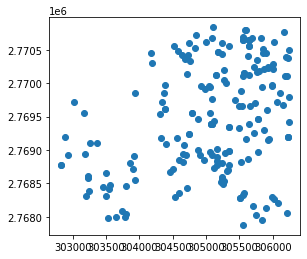

In [2]:
df_final=pd.read_csv('pre_df_WGS84.csv',encoding='utf-8')
geom = [Point(xy) for xy in zip(df_final.lon, df_final.lat)]
crs = {'init': 'epsg:4326'}
gf_final = gpd.GeoDataFrame(df_final, crs=crs, geometry=geom)
gf_final = gf_final.to_crs(epsg=3826)
gf_final['ID'] = gf_final.index
gf_final = gf_final[['ID','屋齡','建物現況格局-房','建物現況格局-廳','建物現況格局-衛','電梯','單價元平方公尺','geometry']]
gf_final.info()
gf_final.plot()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 197 entries, 0 to 196
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   ID        197 non-null    int64   
 1   屋齡        197 non-null    int64   
 2   建物現況格局-房  197 non-null    int64   
 3   建物現況格局-廳  197 non-null    int64   
 4   建物現況格局-衛  197 non-null    int64   
 5   電梯        197 non-null    object  
 6   單價元平方公尺   197 non-null    int64   
 7   geometry  197 non-null    geometry
dtypes: geometry(1), int64(6), object(1)
memory usage: 12.4+ KB


/usr/local/lib/python3.10/dist-packages/pyproj/crs/crs.py:130: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


<AxesSubplot:>

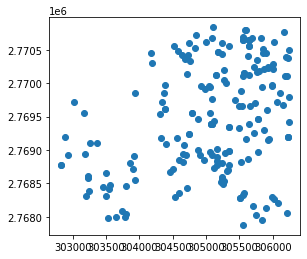

In [3]:
df_house=pd.read_csv('pre_df_WGS84.csv',encoding='utf-8')
geom = [Point(xy) for xy in zip(df_house.lon, df_house.lat)]
crs = {'init': 'epsg:4326'}
gf_house = gpd.GeoDataFrame(df_house, crs=crs, geometry=geom)
gf_house = gf_house.to_crs(epsg=3826)
gf_house['ID'] = gf_house.index
gf_house = gf_house[['ID','屋齡','建物現況格局-房','建物現況格局-廳','建物現況格局-衛','電梯','單價元平方公尺','geometry']]
gf_house.info()
gf_house.plot()

<AxesSubplot:>

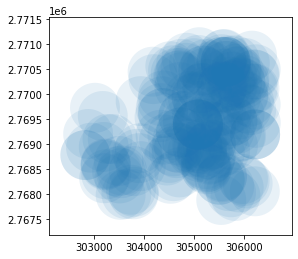

In [4]:
gf_house_buf = gf_house
gf_house_buf['geometry'] = gf_house.buffer(500)
gf_house_buf.plot(alpha=0.1)

In [5]:
df_hospital=pd.read_csv('./dataset/taiwan_hospital_getcoordinates.csv',encoding='utf-8')
geom = [Point(xy) for xy in zip(df_hospital.lon, df_hospital.lat)]
crs = {'init': 'epsg:4326'}
gf_hospital = gpd.GeoDataFrame(df_hospital, crs=crs, geometry=geom)
gf_hospital = gf_hospital.to_crs(epsg=3826)

/usr/local/lib/python3.10/dist-packages/pyproj/crs/crs.py:130: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


In [6]:
df_cstore=pd.read_csv('./dataset/taiwan_convenience_store_getcoordinates.csv',encoding='utf-8')
geom = [Point(xy) for xy in zip(df_cstore.lon, df_cstore.lat)]
crs = {'init': 'epsg:4326'}
gf_cstore = gpd.GeoDataFrame(df_cstore, crs=crs, geometry=geom)
gf_cstore = gf_cstore.to_crs(epsg=3826)

/usr/local/lib/python3.10/dist-packages/pyproj/crs/crs.py:130: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


In [ ]:
# 讀取geojspn
gf_cemetery = gpd.read_file(f'./dataset/cemetery.geojson', encoding = 'utf-8')
gf_cemetery = gf_cemetery.to_crs(epsg=3826)

gf_fire_station = gpd.read_file(f'./dataset/fire_station.geojson', encoding = 'utf-8')
gf_fire_station = gf_fire_station.to_crs(epsg=3826)

gf_fuel = gpd.read_file(f'./dataset/fuel.geojson', encoding = 'utf-8')
gf_fuel = gf_fuel.to_crs(epsg=3826)

gf_library = gpd.read_file(f'./dataset/library.geojson', encoding = 'utf-8')
gf_library = gf_library.to_crs(epsg=3826)

gf_marketplace = gpd.read_file(f'./dataset/marketplace.geojson', encoding = 'utf-8')
gf_marketplace = gf_marketplace.to_crs(epsg=3826)

gf_park = gpd.read_file(f'./dataset/park.geojson', encoding = 'utf-8')
gf_park = gf_park.to_crs(epsg=3826)

gf_parking = gpd.read_file(f'./dataset/parking.geojson', encoding = 'utf-8')
gf_parking = gf_parking.to_crs(epsg=3826)

gf_place_of_worship = gpd.read_file(f'./dataset/place_of_worship.geojson', encoding = 'utf-8')
gf_place_of_worship = gf_place_of_worship.to_crs(epsg=3826)

gf_police = gpd.read_file(f'./dataset/police.geojson', encoding = 'utf-8')
gf_police = gf_police.to_crs(epsg=3826)

gf_school = gpd.read_file(f'./dataset/school.geojson', encoding = 'utf-8')
gf_school = gf_school.to_crs(epsg=3826)

gf_station = gpd.read_file(f'./dataset/station.geojson', encoding = 'utf-8')
gf_station = gf_station.to_crs(epsg=3826)

gf_university = gpd.read_file(f'./dataset/university.geojson', encoding = 'utf-8')
gf_university = gf_university.to_crs(epsg=3826)

<AxesSubplot:>

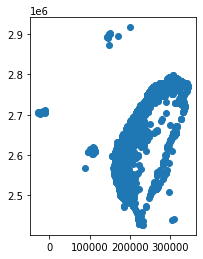

In [14]:
gf_cstore.plot()

<AxesSubplot:>

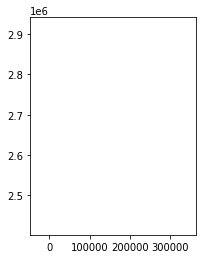

In [15]:
gf_cstore['geometry'] = gf_cstore.buffer(0.001)
gf_cstore.plot()

In [19]:
intersection = gpd.overlay(gf_house_buf,gf_cstore,  how='intersection', keep_geom_type=True)
#intersection['PARKING_AREA'] = intersection['geometry'].area
intersection_count = intersection.groupby('ID').agg({'分公司名稱':'count'})
#intersection_count = intersection.groupby('ID').agg({'PARKING_AREA':'sum'})
intersection_count

,分公司名稱
ID,
0,25
1,26
2,19
3,28
4,10
...,...
192,28
193,34
194,27


In [20]:
gf_final = gf_final.merge(intersection_count,how='left', left_on='ID', right_on='ID')

In [21]:
gf_final.rename(columns={'分公司名稱': 'CSTORE_COUNT'}, inplace=True)
#gf_final.loc[gf_final['NEAR_STATION']>0, 'NEAR_STATION'] = 1
gf_final['CSTORE_COUNT'] = gf_final['CSTORE_COUNT'].fillna(0)
print(gf_final.info())
gf_final

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 197 entries, 0 to 196
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   ID              197 non-null    int64   
 1   屋齡              197 non-null    int64   
 2   建物現況格局-房        197 non-null    int64   
 3   建物現況格局-廳        197 non-null    int64   
 4   建物現況格局-衛        197 non-null    int64   
 5   電梯              197 non-null    object  
 6   單價元平方公尺         197 non-null    int64   
 7   geometry        197 non-null    geometry
 8   HOSPITAL_COUNT  197 non-null    int64   
 9   分公司狀態           197 non-null    int64   
 10  CSTORE_COUNT    197 non-null    int64   
dtypes: geometry(1), int64(9), object(1)
memory usage: 18.5+ KB
None


,ID,屋齡,建物現況格局-房,建物現況格局-廳,建物現況格局-衛,電梯,單價元平方公尺,geometry,HOSPITAL_COUNT,分公司狀態,CSTORE_COUNT
0,0,37,3,2,2,有,245443,POINT (305313.398 2768682.942),56,25,25
1,1,37,2,2,2,有,257275,POINT (305163.377 2768831.302),73,26,26
2,2,36,5,4,2,有,314764,POINT (304703.063 2768917.030),66,19,19
3,3,43,3,1,2,有,286978,POINT (306238.393 2770496.194),122,28,28
4,4,35,5,3,4,無,228840,POINT (303493.585 2768658.586),44,10,10
...,...,...,...,...,...,...,...,...,...,...,...
192,192,41,1,2,1,無,244575,POINT (305866.179 2769305.300),77,28,28
193,193,45,1,1,1,有,351357,POINT (305569.615 2770146.843),212,34,34
194,194,45,3,2,2,有,338271,POINT (305083.662 2770683.814),167,27,27
195,195,44,4,2,2,有,284970,POINT (305899.431 2770459.877),179,40,40


In [ ]:
gf_final.loc[gf_final['電梯']=='有', '電梯'] = 1
gf_final.loc[gf_final['電梯']=='無', '電梯'] = 0
gf_final

In [22]:
#gf_final = gf_final[['屋齡','建物現況格局-房','建物現況格局-廳','建物現況格局-衛','電梯','NEAR_CEMETERY','NEAR_UNIVERSITY','NEAR_FIRESTATION','NEAR_FUEL','NEAR_LIBRARY','NEAR_MARKET','PARK_AREA','PARKING_AREA','TEMPLE_COUNT','NEAR_POLICE','NEAR_SCHOOL','NEAR_STATION','單價元平方公尺']]
gf_final.to_csv('final_df1.csv')